In [ ]:
with open("names.txt", "r") as fnames:
    words = fnames.read().splitlines()

In [2]:
len(words), words[0]

(32033, 'emma')

In [3]:
min(len(w) for w in words), max(len(w) for w in words)

(2, 15)

In [4]:
freq_stats = {}
for w in words:
    w = ['<S>'] + list(w) + ['<E>']
    for c1, c2 in zip(w, w[1:]):
        bigram = c1, c2
        freq_stats[bigram] = freq_stats.get(bigram, 0) + 1

In [5]:
sorted(freq_stats.items(), key = lambda kv: kv[1])

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [6]:
import torch

In [7]:
special_tokens = ['.']
vocab = special_tokens + sorted(list(set(''.join(words))))
vocab_size = len(vocab)
freq_stats = torch.zeros((vocab_size, vocab_size), dtype=torch.int32)
stoi = {c:i for i,c in enumerate(vocab)}
itos = vocab
stoi['p'], itos[15]

(16, 'o')

In [8]:
for w in words:
    w = ['.'] + list(w) + ['.']
    for c1, c2 in zip(w, w[1:]):
        freq_stats[stoi[c1], stoi[c2]] += 1

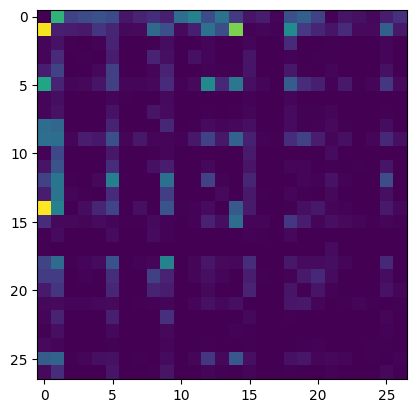

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(freq_stats)

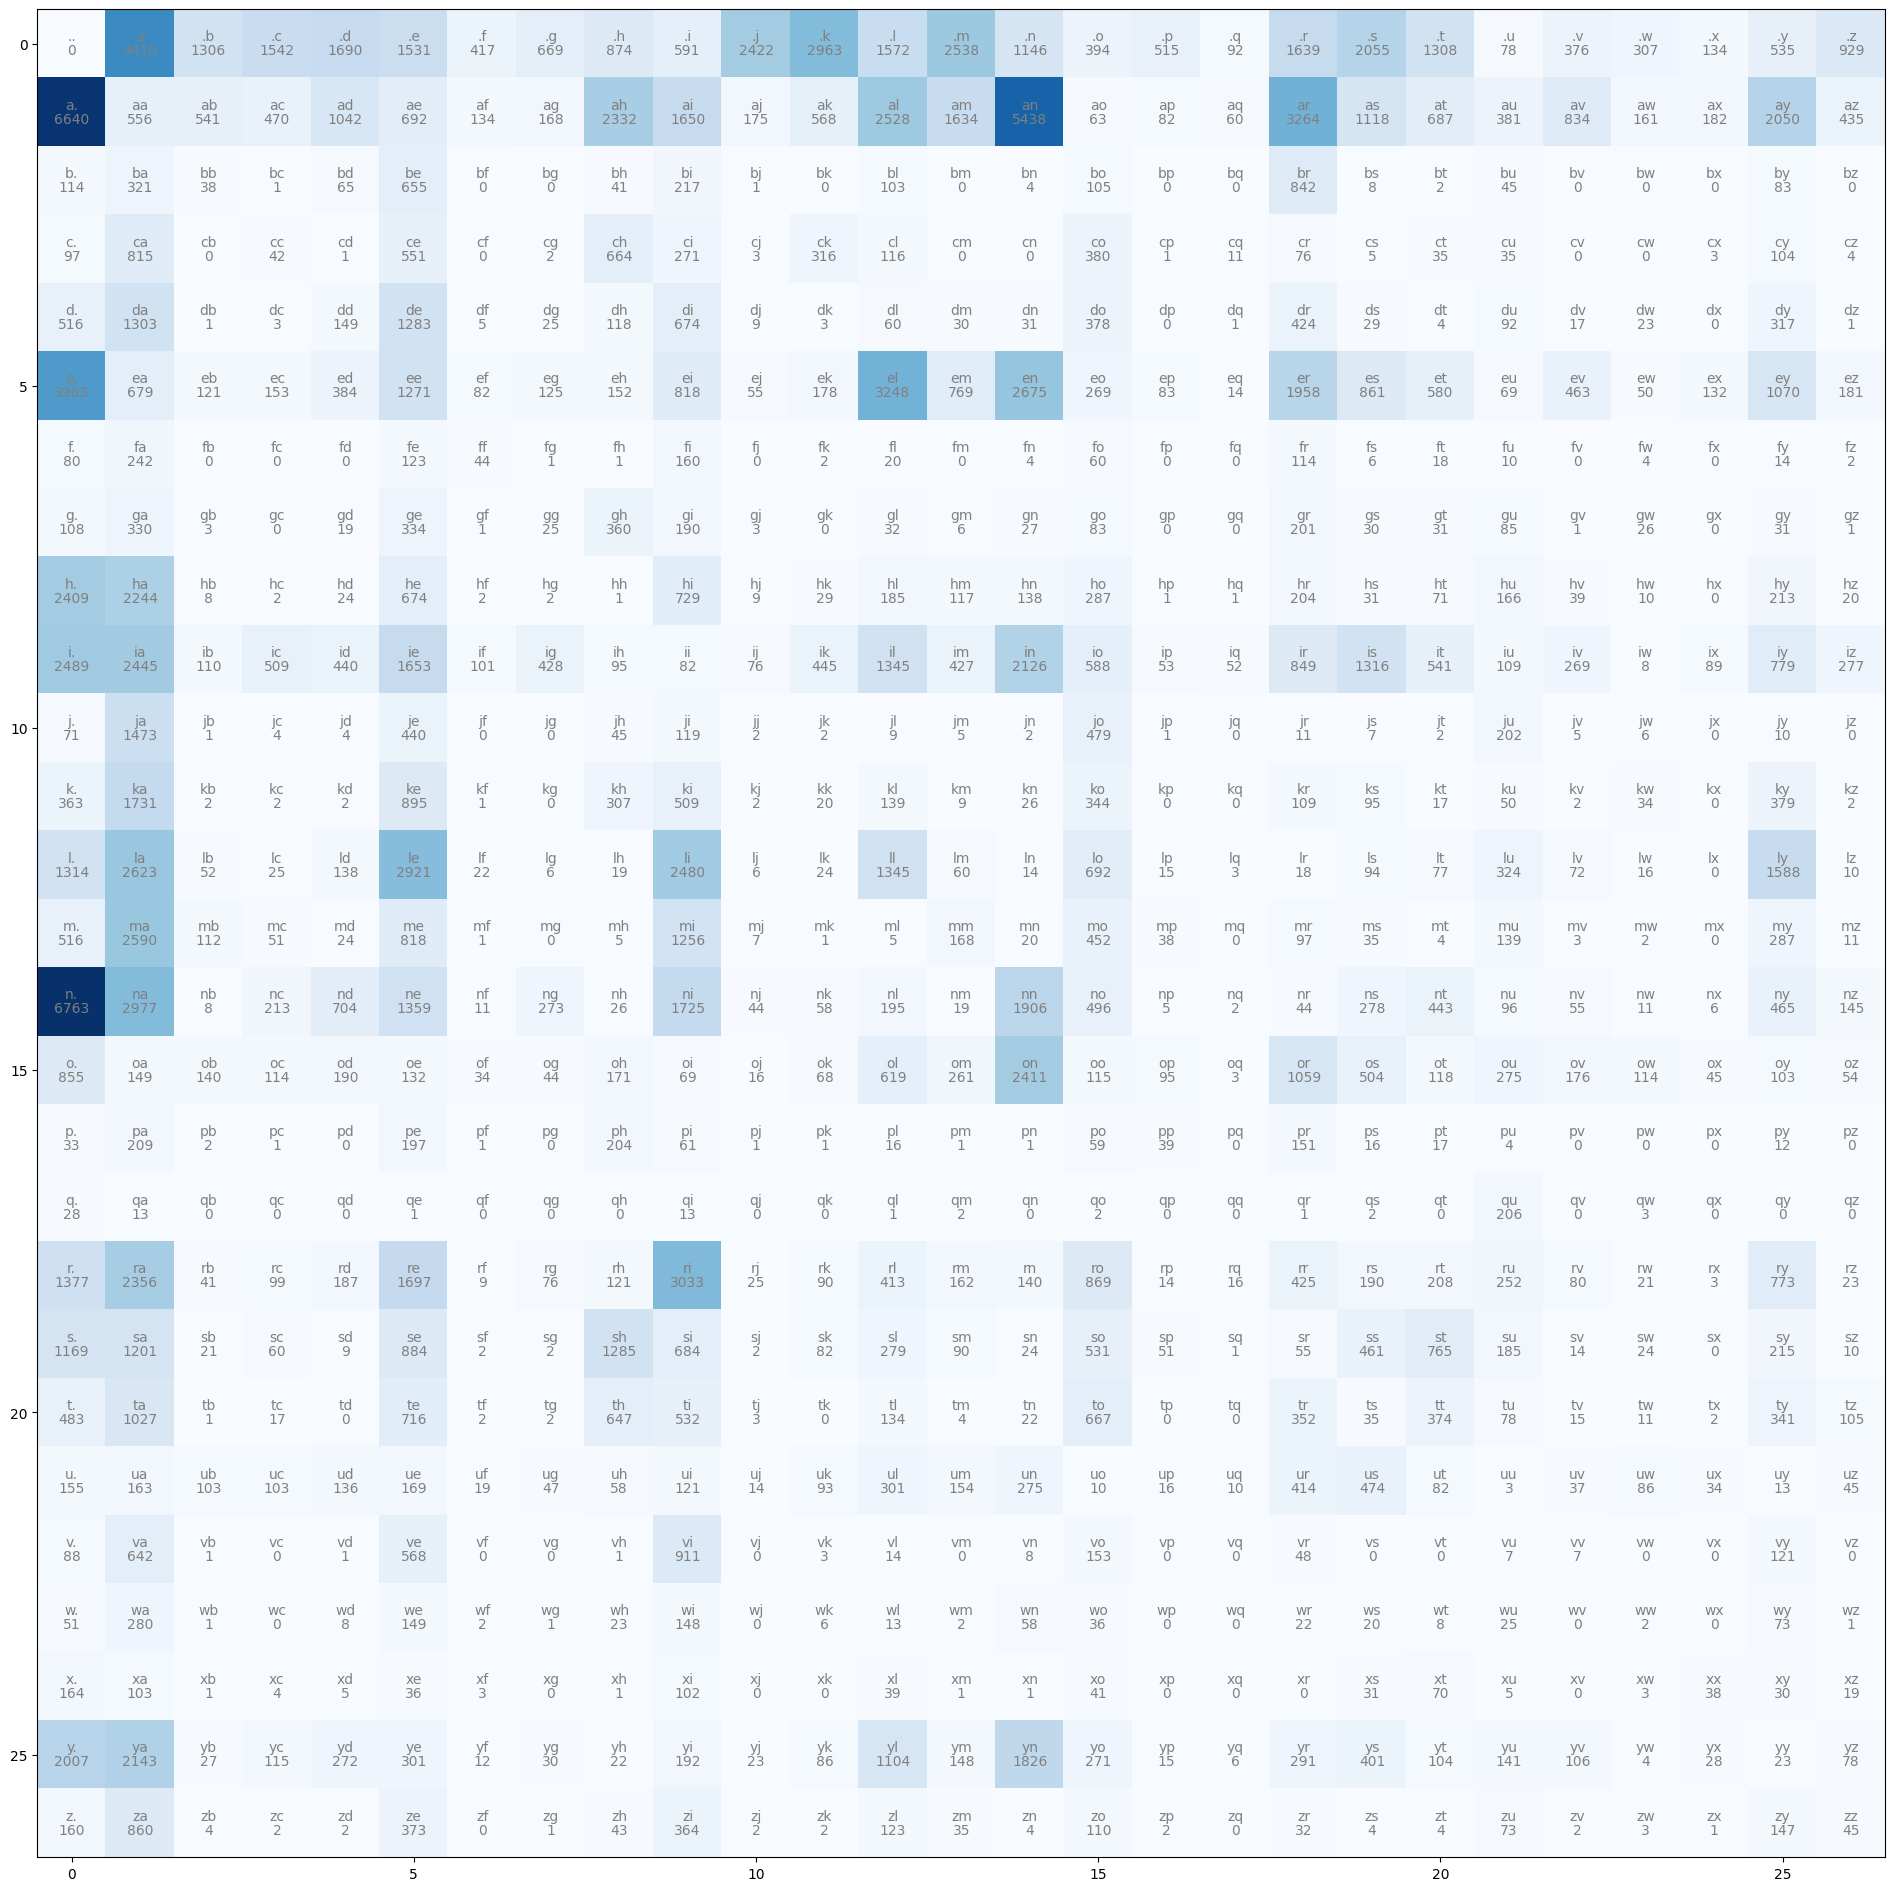

In [154]:
plt.figure(figsize=(24,24))
plt.imshow(freq_stats, cmap='Blues')
for i in range(vocab_size):
    for j in range(vocab_size):
        char_seq = itos[i] + itos[j]
        freq = freq_stats[i, j]
        plt.text(j, i, char_seq, ha='center', va='bottom', color='grey')
        plt.text(j, i, freq.item(), ha='center', va='top', color='grey')

In [11]:
p = freq_stats[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [12]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [13]:
samples = torch.multinomial(p, num_samples=10000000, replacement=True, generator=g)
_, counts = torch.unique(samples, return_counts=True)
counts / counts.sum()

tensor([0.6065, 0.3033, 0.0902])

In [14]:
def frequentist_inference(stats_table, vocab_size, generator, limit=1000):
    idx = 0
    result = []
    for i in range(limit):
        probs = stats_table[idx].float()
        probs = probs / probs.sum()
        idx = torch.multinomial(probs, num_samples=1, generator=generator).item()
        result.append(itos[idx])
        if idx == 0:
            break
    return result

In [15]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    print(''.join(frequentist_inference(freq_stats, vocab_size, g)))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [16]:
def frequentist_prepared_inference(stats_table, vocab_size, generator, limit=1000):
    idx = 0
    result = []
    for i in range(limit):
        probs = stats_table[idx]
        idx = torch.multinomial(probs, num_samples=1, generator=generator).item()
        result.append(itos[idx])
        if idx == 0:
            break
    return result


In [17]:
freq_stats_prepared = freq_stats.float()
freq_stats_prepared /= freq_stats_prepared.sum(axis=1, keepdims=True)

freq_stats_prepared.sum(axis=1).shape, \
freq_stats_prepared.sum(axis=1, keepdims=True).shape, \
freq_stats_prepared[0].sum()

(torch.Size([27]), torch.Size([27, 1]), tensor(1.))

In [18]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    print(''.join(frequentist_prepared_inference(freq_stats_prepared, vocab_size, g)))

junide.
janasah.
p.
cony.
a.


In [19]:
for i in range(3):
    for j in range(4):
        print(f'{freq_stats_prepared[i, j]=}')

freq_stats_prepared[i, j]=tensor(0.)
freq_stats_prepared[i, j]=tensor(0.1377)
freq_stats_prepared[i, j]=tensor(0.0408)
freq_stats_prepared[i, j]=tensor(0.0481)
freq_stats_prepared[i, j]=tensor(0.1960)
freq_stats_prepared[i, j]=tensor(0.0164)
freq_stats_prepared[i, j]=tensor(0.0160)
freq_stats_prepared[i, j]=tensor(0.0139)
freq_stats_prepared[i, j]=tensor(0.0431)
freq_stats_prepared[i, j]=tensor(0.1214)
freq_stats_prepared[i, j]=tensor(0.0144)
freq_stats_prepared[i, j]=tensor(0.0004)


In [20]:
likelihood = 1
log_likelihood = 0
sample_size = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chs, chs[1:]):
        i1, i2 = stoi[c1], stoi[c2]
        prob = freq_stats_prepared[i1, i2]
        likelihood *= prob
        log_likelihood += torch.log(prob)
        sample_size += 1
neg_log_likelihood = -log_likelihood
print(f'{likelihood=}, {log_likelihood=}, {neg_log_likelihood=};')
print(f'normalized negative log likelihood = {neg_log_likelihood/sample_size}')

likelihood=tensor(1.4309e-17), log_likelihood=tensor(-38.7856), neg_log_likelihood=tensor(38.7856);
normalized negative log likelihood = 2.424102306365967


### Infinities issue

If some frequencies are zero, so corresponding probabilities will be 0 which makes log likelihood be -inf. To fix this people usually add some small value to all frequencies, in order to 'smooth' those fequencies. 

In [30]:
def likelihood_values(freq_stats, words_sample):
    likelihood = 1
    log_likelihood = 0
    sample_size = 0
    for w in words_sample:
        chs = ['.'] + list(w) + ['.']
        for c1, c2 in zip(chs, chs[1:]):
            i1, i2 = stoi[c1], stoi[c2]
            prob = freq_stats[i1, i2]
            likelihood *= prob
            log_likelihood += torch.log(prob)
            sample_size += 1
    neg_log_likelihood = -log_likelihood
    return likelihood, log_likelihood, neg_log_likelihood, sample_size

likelihood, log_likelihood, neg_log_likelihood, sample_size = likelihood_values(freq_stats_prepared, ['vjlad'])
print(f'{likelihood=}, {log_likelihood=}, {neg_log_likelihood=};')
print(f'normalized negative log likelihood = {neg_log_likelihood/sample_size}')

likelihood=tensor(0.), log_likelihood=tensor(-inf), neg_log_likelihood=tensor(inf);
normalized negative log likelihood = inf


In [33]:
# 1 is typical vallue to add as it resolves infinity issue and keeps probs distribution close to original
# the bigger value you add, the closer result to uniform distribution
freq_stats_smoothed = (freq_stats+1).float()
freq_stats_smoothed /= freq_stats_smoothed.sum(1, keepdims=True)
likelihood, log_likelihood, neg_log_likelihood, sample_size = likelihood_values(freq_stats_smoothed, ['vjlad'])
print(f'{likelihood=}, {log_likelihood=}, {neg_log_likelihood=};')
print(f'normalized negative log likelihood = {neg_log_likelihood/sample_size}')

likelihood=tensor(8.3470e-12), log_likelihood=tensor(-25.5091), neg_log_likelihood=tensor(25.5091);
normalized negative log likelihood = 4.25152063369751


### Dataset Preparing For Neural Networks

In [49]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])
X = torch.tensor(xs)
y = torch.tensor(ys)
print(X, y)
print(X.shape, y.shape)

import torch.nn.functional as F
X = F.one_hot(X, num_classes=27).float()
X.shape

tensor([ 0,  5, 13,  ..., 25, 26, 24]) tensor([ 5, 13, 13,  ..., 26, 24,  0])
torch.Size([228146]) torch.Size([228146])


torch.Size([228146, 27])

(torch.float32, <matplotlib.image.AxesImage at 0x7f2eaf916da0>)

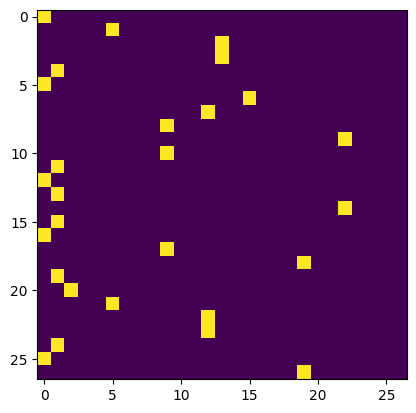

In [53]:
X.dtype, plt.imshow(X[:27])

### Simplest neural net

- single layer of 27 inputs and 27 outputs
- outputs are probabilities of the next symbol in a sequence

finally, counts we calculate with weight matrix should become closer to freq_stats matrix, as neural net should approximate distribution of training set. It is because we do not change an approach: given the current token we predict the next one. So neural net should learn theese statistics.

In [69]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)
logits = X @ W # log-counts
# ----- Equal to Softmax operation -----
counts = logits.exp() # expoentiated log-counts = regular counts
probs  = counts / counts.sum(1, keepdims=True)
# --------------------------------------
probs

tensor([[0.0607, 0.0100, 0.0123,  ..., 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248,  ..., 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484,  ..., 0.1204, 0.0469, 0.0126],
        ...,
        [0.0301, 0.0080, 0.0090,  ..., 0.0125, 0.0531, 0.0111],
        [0.0634, 0.0270, 0.0101,  ..., 0.0833, 0.0175, 0.0517],
        [0.0308, 0.0113, 0.0178,  ..., 0.0190, 0.0116, 0.0562]])

In [70]:
torch.allclose(probs.sum(1), torch.ones(probs.shape[0]))

True

### Rearange Softmax Values

Softmax calculation has exponentiation as intermediate part, so we can face float32 overflow. To fix this we can subract the biggest value in softmax input as it does not change softmax result

In [98]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)
logits = X @ W # log-counts
# ----- Equal to Softmax operation -----
logits = logits - torch.max(logits, axis=1, keepdims=True).values
counts = logits.exp() # expoentiated log-counts = regular counts
probs2  = counts / counts.sum(axis=1, keepdims=True)
# --------------------------------------
torch.allclose(probs, probs2), probs2

(True,
 tensor([[0.0607, 0.0100, 0.0123,  ..., 0.0118, 0.1537, 0.1459],
         [0.0290, 0.0796, 0.0248,  ..., 0.0118, 0.0022, 0.0472],
         [0.0312, 0.0737, 0.0484,  ..., 0.1204, 0.0469, 0.0126],
         ...,
         [0.0301, 0.0080, 0.0090,  ..., 0.0125, 0.0531, 0.0111],
         [0.0634, 0.0270, 0.0101,  ..., 0.0833, 0.0175, 0.0517],
         [0.0308, 0.0113, 0.0178,  ..., 0.0190, 0.0116, 0.0562]]))

### Gradient descent

In [219]:
g = torch.Generator().manual_seed(2147483647)
epoches = 200
W = torch.randn((27, 27), generator=g, requires_grad=True)
for i in range(epoches):
    logits = X @ W
    logits = logits - torch.max(logits, axis=1, keepdims=True).values
    pseudo_counts = logits.exp()
    probabilities = pseudo_counts / pseudo_counts.sum(dim=1, keepdims=True)
    neg_log_lhood_loss = -probabilities[torch.arange(X.shape[0]), y.flatten()].log().mean()
    W.grad = None
    neg_log_lhood_loss.backward()
    W.data -= 20*W.grad
    if i % 20 == 19:
        print(f'epoch {i}: {neg_log_lhood_loss=}')
        

epoch 19: neg_log_lhood_loss=tensor(2.7566, grad_fn=<NegBackward0>)
epoch 39: neg_log_lhood_loss=tensor(2.6103, grad_fn=<NegBackward0>)
epoch 59: neg_log_lhood_loss=tensor(2.5548, grad_fn=<NegBackward0>)
epoch 79: neg_log_lhood_loss=tensor(2.5267, grad_fn=<NegBackward0>)
epoch 99: neg_log_lhood_loss=tensor(2.5099, grad_fn=<NegBackward0>)
epoch 119: neg_log_lhood_loss=tensor(2.4991, grad_fn=<NegBackward0>)
epoch 139: neg_log_lhood_loss=tensor(2.4915, grad_fn=<NegBackward0>)
epoch 159: neg_log_lhood_loss=tensor(2.4861, grad_fn=<NegBackward0>)
epoch 179: neg_log_lhood_loss=tensor(2.4819, grad_fn=<NegBackward0>)
epoch 199: neg_log_lhood_loss=tensor(2.4786, grad_fn=<NegBackward0>)


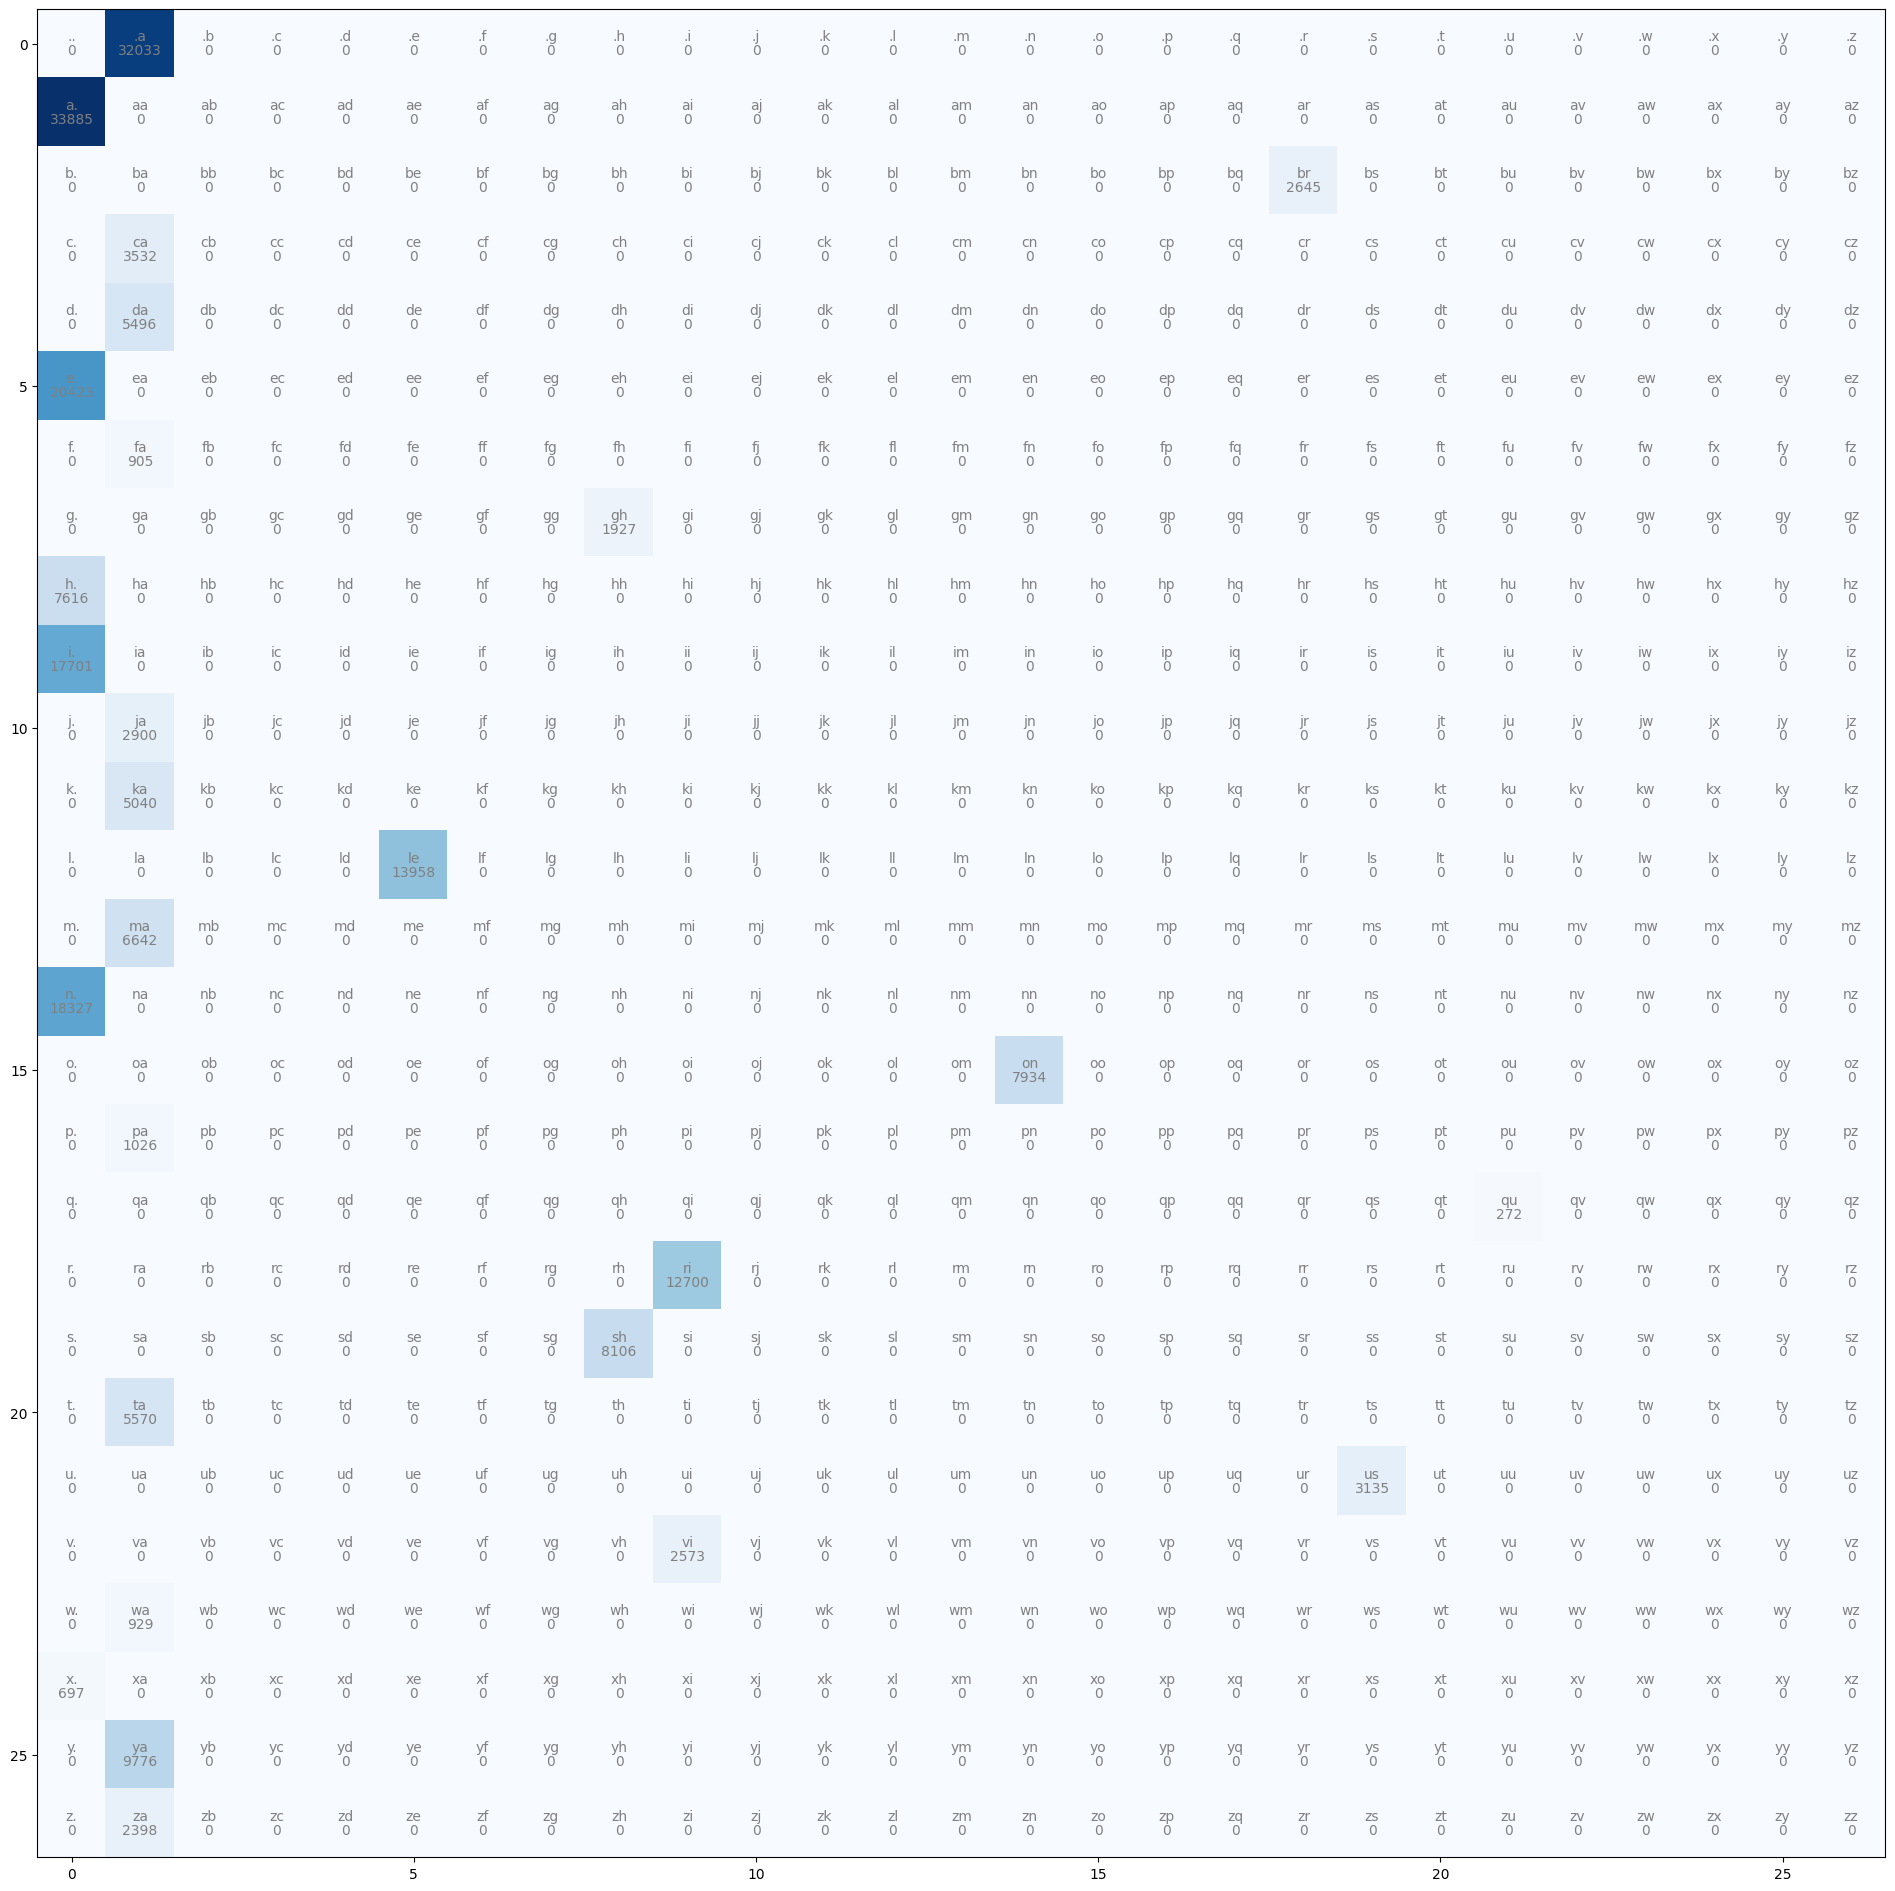

In [220]:
out = (X @ W).argmax(dim=1)
stats = torch.zeros((vocab_size, vocab_size)).to(torch.int)
for i in range(X.shape[0]):
    stats[xs[i], out[i]] += 1

plt.figure(figsize=(24,24))
plt.imshow(stats.detach(), cmap='Blues')
for i in range(vocab_size):
    for j in range(vocab_size):
        char_seq = itos[i] + itos[j]
        plt.text(j, i, char_seq, ha='center', va='bottom', color='grey')
        plt.text(j, i, stats[i, j].item(), ha='center', va='top', color='grey')

In [221]:
vocab_size**2, torch.count_nonzero((freq_stats == stats))

(729, tensor(102))

### Regularization

In [228]:
g = torch.Generator().manual_seed(2147483647)
epoches = 3000
W = torch.randn((27, 27), generator=g, requires_grad=True)
for i in range(epoches):
    logits = X @ W
    logits = logits - torch.max(logits, axis=1, keepdims=True).values
    pseudo_counts = logits.exp()
    probabilities = pseudo_counts / pseudo_counts.sum(dim=1, keepdims=True)
    neg_log_lhood_loss = -probabilities[torch.arange(X.shape[0]), y.flatten()].log().mean()
    loss = neg_log_lhood_loss + 0.1*(W**2).mean()
    W.grad = None
    loss.backward()
    W.data -= 50/torch.log(torch.tensor(i+2))*W.grad
    if i % 100 == 99:
        neg_log_lhood_loss = neg_log_lhood_loss.item()
        print(f'epoch {i+1}: {neg_log_lhood_loss=}')

epoch 100: neg_log_lhood_loss=2.5424654483795166
epoch 200: neg_log_lhood_loss=2.517596960067749
epoch 300: neg_log_lhood_loss=2.5100791454315186
epoch 400: neg_log_lhood_loss=2.5069189071655273
epoch 500: neg_log_lhood_loss=2.5053677558898926
epoch 600: neg_log_lhood_loss=2.504533052444458
epoch 700: neg_log_lhood_loss=2.5040550231933594
epoch 800: neg_log_lhood_loss=2.5037689208984375
epoch 900: neg_log_lhood_loss=2.503591537475586
epoch 1000: neg_log_lhood_loss=2.503478765487671
epoch 1100: neg_log_lhood_loss=2.503405809402466
epoch 1200: neg_log_lhood_loss=2.503357172012329
epoch 1300: neg_log_lhood_loss=2.5033249855041504
epoch 1400: neg_log_lhood_loss=2.503302812576294
epoch 1500: neg_log_lhood_loss=2.5032875537872314
epoch 1600: neg_log_lhood_loss=2.503277063369751
epoch 1700: neg_log_lhood_loss=2.503269672393799
epoch 1800: neg_log_lhood_loss=2.5032641887664795
epoch 1900: neg_log_lhood_loss=2.5032601356506348
epoch 2000: neg_log_lhood_loss=2.5032577514648438
epoch 2100: neg_lo

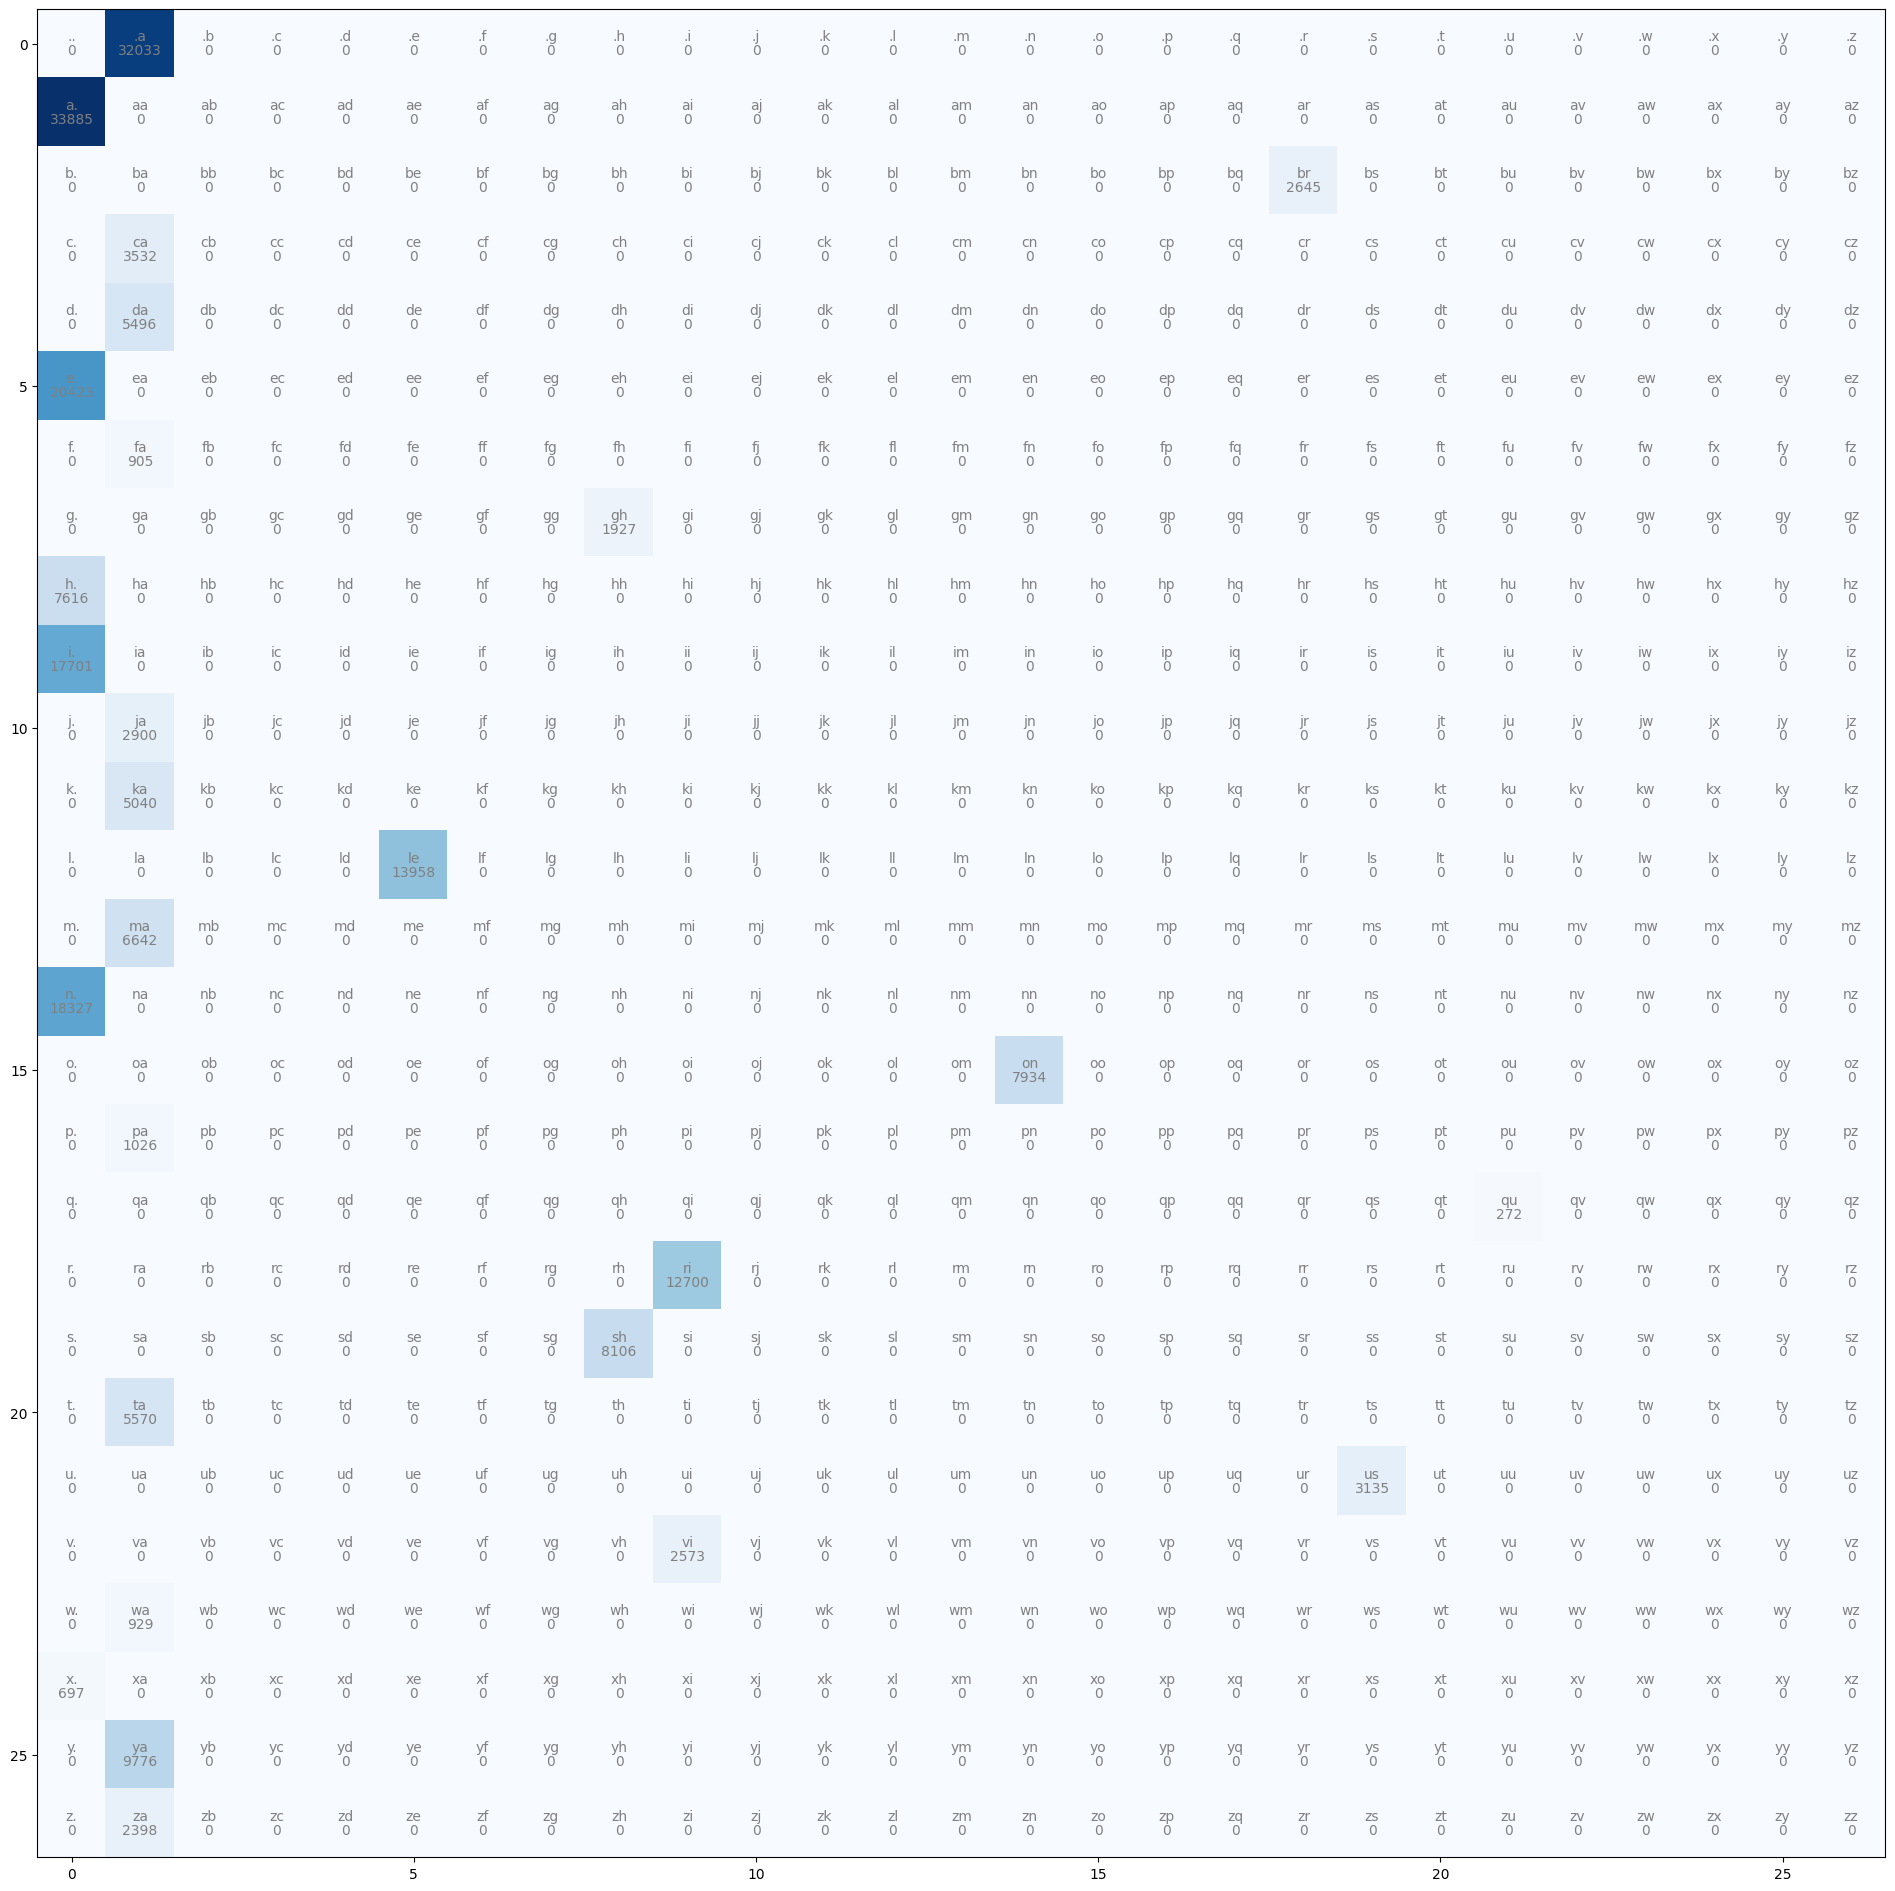

In [229]:
out = (X @ W).argmax(dim=1)
stats = torch.zeros((vocab_size, vocab_size)).to(torch.int)
for i in range(X.shape[0]):
    stats[xs[i], out[i]] += 1

plt.figure(figsize=(24,24))
plt.imshow(stats.detach(), cmap='Blues')
for i in range(vocab_size):
    for j in range(vocab_size):
        char_seq = itos[i] + itos[j]
        plt.text(j, i, char_seq, ha='center', va='bottom', color='grey')
        plt.text(j, i, stats[i, j].item(), ha='center', va='top', color='grey')

In [230]:
vocab_size**2, torch.count_nonzero((freq_stats == stats))

(729, tensor(102))

### Simple NN inference

In [250]:
def nn_inference(W, vocab_size, g, limit=1000):
    idx = 0
    result = []
    for i in range(limit):
        one_hot_idx = F.one_hot(torch.tensor(idx, dtype=torch.long), num_classes=vocab_size).float()
        logits = one_hot_idx @ W
        pseudo_counts = logits.exp()
        probs = pseudo_counts / pseudo_counts.sum()
        idx = torch.multinomial(probs, num_samples=1, generator=g).item()
        result.append(itos[idx])
        if idx == 0:
            break
    return result

In [252]:
# g = torch.Generator().manual_seed(2147483647)
g = torch.Generator().manual_seed(torch.randint(123456, (1,)).item())
for i in range(20):
    print(''.join(nn_inference(W, vocab_size, g)))

riz.
is.
za.
antoormas.
jqufahaquniktmhq.
kerileleorieede.
zmltige.
kaleyvil.
ele.
jasr.
dah.
kazjakelleriluryri.
ayn.
juyofimmase.
esoncynn.
ka.
anay.
brahan.
lqlarietonanahgyadgikqqmoga.
jo.
